In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import hugs_pipe as hp
import lsstutils

In [2]:
tract = 9317
patch = '1,1'
config = hp.Config(tract=tract, patch=patch)
results = hp.run(config, debug_return=True)

hugs-pipe: 9317 | 1,1: 05/08 14:14:06 INFO: starting hugs-pipe with config file /home/jgreco/projects/hugs-pipe/hugs_pipe/default_config.yml


INFO:hugs-pipe: 9317 | 1,1:starting hugs-pipe with config file /home/jgreco/projects/hugs-pipe/hugs_pipe/default_config.yml


hugs-pipe: 9317 | 1,1: 05/08 14:14:15 INFO: performing low threshold at 3.0 sigma


INFO:hugs-pipe: 9317 | 1,1:performing low threshold at 3.0 sigma


hugs-pipe: 9317 | 1,1: 05/08 14:14:17 INFO: performing high threshold at 28.0 sigma


INFO:hugs-pipe: 9317 | 1,1:performing high threshold at 28.0 sigma


hugs-pipe: 9317 | 1,1: 05/08 14:14:18 INFO: generating cleaned exposure


INFO:hugs-pipe: 9317 | 1,1:generating cleaned exposure


hugs-pipe: 9317 | 1,1: 05/08 14:14:21 INFO: detecting in i-band


INFO:hugs-pipe: 9317 | 1,1:detecting in i-band


hugs-pipe: 9317 | 1,1: 05/08 14:14:21 INFO: cleaning non-detection bands


INFO:hugs-pipe: 9317 | 1,1:cleaning non-detection bands


hugs-pipe: 9317 | 1,1: 05/08 14:14:25 INFO: measuring in i-band


INFO:hugs-pipe: 9317 | 1,1:measuring in i-band



running 
-------
sex -c default.sex /scratch/network/jgreco/temp-io/sexin/exp-9317-1-1-i.fits[1] -CATALOG_NAME /scratch/network/jgreco/temp-io/sexout/sex-9317-1-1-i.cat -CHECKIMAGE_NAME /scratch/network/jgreco/temp-io/sexout/9317-1-1-i-SEGMENTATION.fits -PARAMETERS_NAME 9317-1-1-i.params -MEMORY_PIXSTACK 900000 -PHOT_FLUXFRAC 0.5 -MAG_ZEROPOINT 27.0 -PIXEL_SCALE 0.168 -PHOT_APERTURES 3,4,5,6,7,8,16,32 -THRESH_TYPE RELATIVE -WEIGHT_TYPE NONE -DETECT_THRESH 0.7 -FILTER Y -DETECT_MINAREA 100 -CHECKIMAGE_TYPE SEGMENTATION -FILTER_NAME gauss_6.0_31x31.conv -SEEING_FWHM 0.8 -VERBOSE_TYPE QUIET -BACK_SIZE 128

hugs-pipe: 9317 | 1,1: 05/08 14:14:50 INFO: measuring in r-band


INFO:hugs-pipe: 9317 | 1,1:measuring in r-band



running 
-------
sex -c default.sex /scratch/network/jgreco/temp-io/sexin/exp-9317-1-1-i.fits[1],/scratch/network/jgreco/temp-io/sexin/exp-9317-1-1-i-r.fits[1] -CATALOG_NAME /scratch/network/jgreco/temp-io/sexout/sex-9317-1-1-i-r.cat -CHECKIMAGE_NAME /scratch/network/jgreco/temp-io/sexout/9317-1-1-i-SEGMENTATION.fits -PARAMETERS_NAME 9317-1-1-i.params -MEMORY_PIXSTACK 900000 -PHOT_FLUXFRAC 0.5 -MAG_ZEROPOINT 27.0 -PIXEL_SCALE 0.168 -PHOT_APERTURES 3,4,5,6,7,8,16,32 -THRESH_TYPE RELATIVE -WEIGHT_TYPE NONE -DETECT_THRESH 0.7 -FILTER Y -DETECT_MINAREA 100 -CHECKIMAGE_TYPE SEGMENTATION -FILTER_NAME gauss_6.0_31x31.conv -SEEING_FWHM 0.8 -VERBOSE_TYPE QUIET -BACK_SIZE 128

hugs-pipe: 9317 | 1,1: 05/08 14:15:13 INFO: measuring in g-band


INFO:hugs-pipe: 9317 | 1,1:measuring in g-band



running 
-------
sex -c default.sex /scratch/network/jgreco/temp-io/sexin/exp-9317-1-1-i.fits[1],/scratch/network/jgreco/temp-io/sexin/exp-9317-1-1-i-g.fits[1] -CATALOG_NAME /scratch/network/jgreco/temp-io/sexout/sex-9317-1-1-i-g.cat -CHECKIMAGE_NAME /scratch/network/jgreco/temp-io/sexout/9317-1-1-i-SEGMENTATION.fits -PARAMETERS_NAME 9317-1-1-i.params -MEMORY_PIXSTACK 900000 -PHOT_FLUXFRAC 0.5 -MAG_ZEROPOINT 27.0 -PIXEL_SCALE 0.168 -PHOT_APERTURES 3,4,5,6,7,8,16,32 -THRESH_TYPE RELATIVE -WEIGHT_TYPE NONE -DETECT_THRESH 0.7 -FILTER Y -DETECT_MINAREA 100 -CHECKIMAGE_TYPE SEGMENTATION -FILTER_NAME gauss_6.0_31x31.conv -SEEING_FWHM 0.8 -VERBOSE_TYPE QUIET -BACK_SIZE 128

hugs-pipe: 9317 | 1,1: 05/08 14:15:35 INFO: verifying dection in g-band


INFO:hugs-pipe: 9317 | 1,1:verifying dection in g-band



running 
-------
sex -c default.sex /scratch/network/jgreco/temp-io/sexin/exp-9317-1-1-g.fits[1] -CATALOG_NAME /scratch/network/jgreco/temp-io/sexout/sex-9317-1-1-g.cat -CHECKIMAGE_NAME /scratch/network/jgreco/temp-io/sexout/9317-1-1-g-SEGMENTATION.fits -PARAMETERS_NAME 9317-1-1-g.params -MEMORY_PIXSTACK 900000 -PHOT_FLUXFRAC 0.5 -MAG_ZEROPOINT 27.0 -PIXEL_SCALE 0.168 -PHOT_APERTURES 3,4,5,6,7,8,16,32 -THRESH_TYPE RELATIVE -WEIGHT_TYPE NONE -DETECT_THRESH 0.7 -FILTER Y -DETECT_MINAREA 100 -CHECKIMAGE_TYPE SEGMENTATION -FILTER_NAME gauss_6.0_31x31.conv -SEEING_FWHM 0.8 -VERBOSE_TYPE QUIET -BACK_SIZE 128

hugs-pipe: 9317 | 1,1: 05/08 14:15:55 INFO: cuts: 1083 out of 1618 objects detected in g-band


INFO:hugs-pipe: 9317 | 1,1:cuts: 1083 out of 1618 objects detected in g-band


hugs-pipe: 9317 | 1,1: 05/08 14:15:55 INFO: cuts: 1083 objects in cat before cuts


INFO:hugs-pipe: 9317 | 1,1:cuts: 1083 objects in cat before cuts


hugs-pipe: 9317 | 1,1: 05/08 14:15:55 INFO: cuts: will cut 1071 objects with FWHM_IMAGE(i) <= 25


INFO:hugs-pipe: 9317 | 1,1:cuts: will cut 1071 objects with FWHM_IMAGE(i) <= 25


hugs-pipe: 9317 | 1,1: 05/08 14:15:55 INFO: cuts: will cut 16 objects with num_edge_pix >= 1


INFO:hugs-pipe: 9317 | 1,1:cuts: will cut 16 objects with num_edge_pix >= 1


hugs-pipe: 9317 | 1,1: 05/08 14:15:55 INFO: cuts: 11 objects in cat after cuts


INFO:hugs-pipe: 9317 | 1,1:cuts: 11 objects in cat after cuts


hugs-pipe: 9317 | 1,1: 05/08 14:15:55 INFO: running imfit on i-band cutouts


INFO:hugs-pipe: 9317 | 1,1:running imfit on i-band cutouts


hugs-pipe: 9317 | 1,1: 05/08 14:16:14 INFO: running imfit on g-band cutouts


INFO:hugs-pipe: 9317 | 1,1:running imfit on g-band cutouts


hugs-pipe: 9317 | 1,1: 05/08 14:16:21 INFO: running imfit on r-band cutouts


INFO:hugs-pipe: 9317 | 1,1:running imfit on r-band cutouts


hugs-pipe: 9317 | 1,1: 05/08 14:16:28 INFO: finding detectable randoms in patch


INFO:hugs-pipe: 9317 | 1,1:finding detectable randoms in patch


hugs-pipe: 9317 | 1,1: 05/08 14:16:32 INFO: task completed in 2.31 min


INFO:hugs-pipe: 9317 | 1,1:task completed in 2.31 min


In [3]:
exp_clean = results.exp_clean
df = results.randoms_results.df

In [4]:
wcs = exp_clean.getWcs()
xy0 = exp_clean.getXY0()
coords = lsstutils.make_afw_coords(df.loc[df['detected']==1, ['ra', 'dec']].values)
pixels = [wcs.skyToPixel(coord) - xy0 for coord in coords]
pixels = [(pix.getY(), pix.getX()) for pix in pixels]
pixels = np.array(pixels)

mask = exp_clean.getMaskedImage().getMask()
mask_arr = hp.randoms.get_mask_array(exp_clean)

img_width = exp_clean.getWidth()
img_height = exp_clean.getHeight()

(0, 4199)

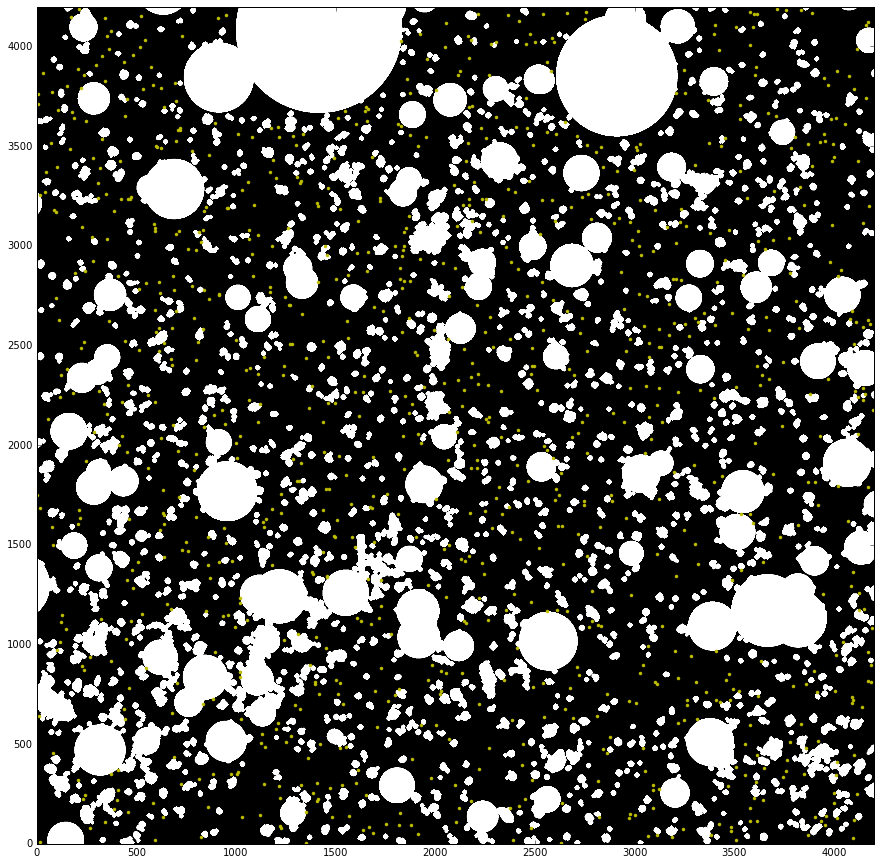

In [5]:
plt.figure(figsize=(15, 15))
plt.imshow(mask_arr, origin='lower', cmap='gray')
plt.plot(pixels[:,0], pixels[:,1], 'y.')
plt.xlim(0, img_width-1)
plt.ylim(0, img_height-1)